In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
df = pd.read_csv("/content/creditcard.csv")

In [3]:
# Display the first few rows of the dataframe
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
# Check for missing values
print(df.isna().sum().sum())

0


In [5]:
# Display the dimensions of the dataframe
print(df.shape)

(284807, 31)


In [6]:
# Count the distribution of the 'Class' variable
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


In [7]:
# Summary statistics for the 'Amount' column
print(df['Amount'].describe())

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


In [8]:
# Display column names
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [9]:
# Variance of the 'Amount' column
print(df['Amount'].var())

62560.06904632383


In [10]:
# Standard deviation of the 'Amount' column
print(df['Amount'].std())

250.1201092401885


In [13]:
# Scaling the 'Amount' column
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

In [14]:
# Dropping the 'Time' column
df.drop(['Time'], axis=1, inplace=True)

In [15]:
# Splitting data into features and target
X = df.drop('Class', axis=1)
y = df['Class']

In [16]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [17]:
# Logistic Regression Model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
# Making predictions
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

In [18]:
# Decision Tree Model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
# Making predictions
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]

In [19]:
# Gradient Boosting Model
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.01, max_depth=3, min_samples_leaf=100, subsample=0.5, random_state=123)
gb.fit(X_train, y_train)
# Making predictions
y_pred_gb = gb.predict(X_test)
y_prob_gb = gb.predict_proba(X_test)[:, 1]

In [20]:
# To plot confusion matrix
def plot_cm(model, y_test, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()

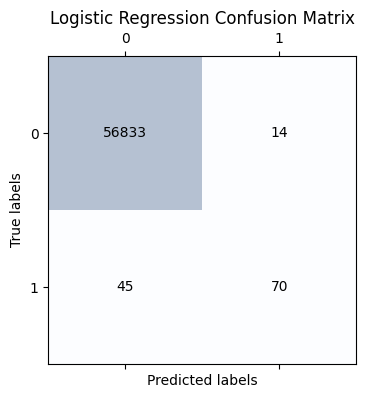

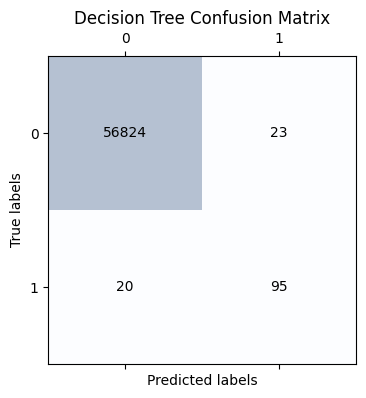

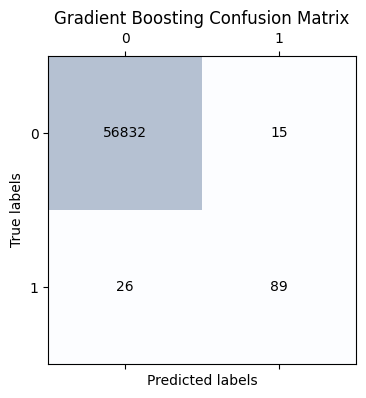

In [21]:
# Plotting Confusion Matrices
plot_cm(lr, y_test, y_pred_lr, 'Logistic Regression Confusion Matrix')
plot_cm(dt, y_test, y_pred_dt, 'Decision Tree Confusion Matrix')
plot_cm(gb, y_test, y_pred_gb, 'Gradient Boosting Confusion Matrix')

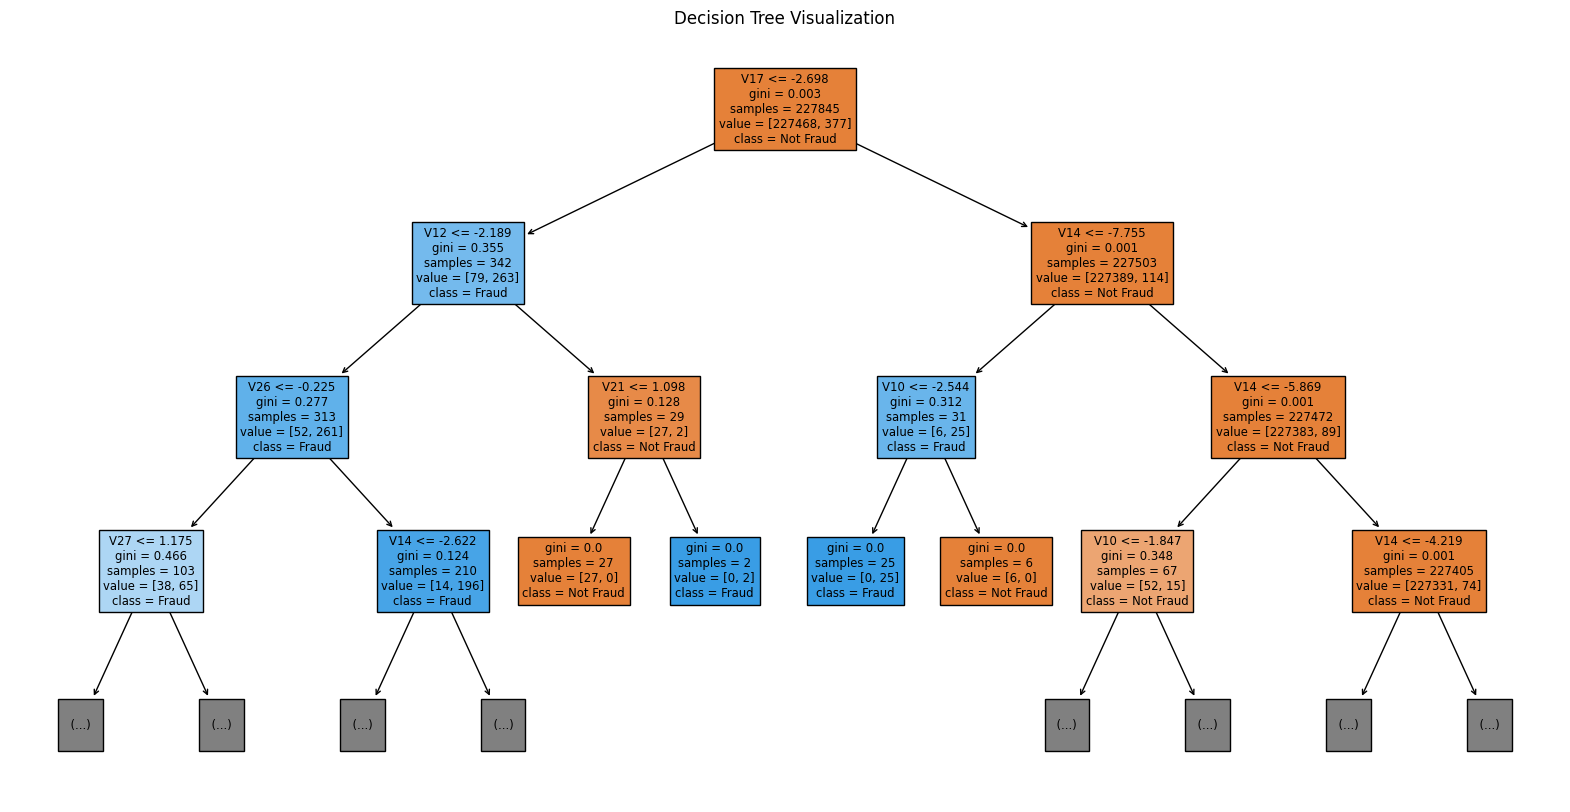

In [ ]:
# Decision Tree Visualization
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, max_depth=3, feature_names=X.columns, class_names=['Not Fraud', 'Fraud'])
plt.title('Decision Tree Visualization')
plt.show()

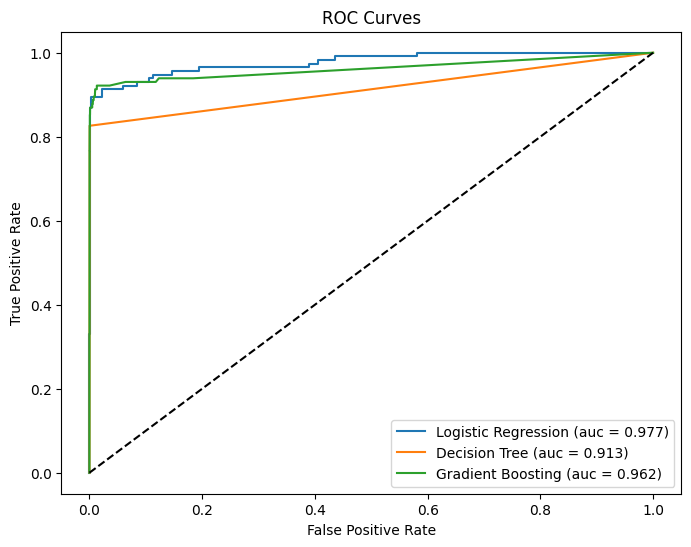

In [22]:
# Plotting ROC Curves
def plot_roc(y_test, y_prob, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{model_name} (auc = {auc:.3f})")

plt.figure(figsize=(8, 6))
plot_roc(y_test, y_prob_lr, 'Logistic Regression')
plot_roc(y_test, y_prob_dt, 'Decision Tree')
plot_roc(y_test, y_prob_gb, 'Gradient Boosting')
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='best')
plt.show()